In [2]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 9 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 9 
Number of the dataset : 3



In [3]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

In [5]:
import random

def random_delete_edges(graph, percentage=0.1):
    edges_to_delete = random.sample(graph.edges(), int(percentage * graph.number_of_edges()))
    graph.remove_edges_from(edges_to_delete)

random_delete_edges(facebook_network) 


/tmp/ipykernel_2334/501423479.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), int(percentage * graph.number_of_edges()))


In [6]:
# You can use any feature extraction methods suitable for your problem
# For example, degree centrality as a simple feature
facebook_features = nx.degree_centrality(facebook_network) 


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, roc_curve

# Assuming you have already deleted 10% of edges and have your graph ready
# Extract features (e.g., degree centrality) and define labels
features = []
labels = []

# For Facebook network
for node in facebook_network.nodes():
    # Example: using degree centrality as a feature
    features.append(facebook_network.degree[node])
    
    # Labeling: 1 for existing edges, 0 for deleted edges
    neighbors = list(facebook_network.neighbors(node))
    for neighbor in neighbors:
        if facebook_network.has_edge(node, neighbor) or facebook_network.has_edge(neighbor, node):
            labels.append(1)
        else:
            labels.append(0)

# Convert lists to numpy arrays for compatibility with scikit-learn
import numpy as np
features = np.array(features).reshape(-1, 1)
labels = np.array(labels)

# Ensure features and labels have the same length
min_length = min(len(features), len(labels))
features = features[:min_length]
labels = labels[:min_length]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
print(set(y_test))


{1}


In [14]:

unique_classes = np.unique(y_test)
if len(unique_classes) == 1:
    # Handle the case when only one class is present
    print("Only one class present in y_true. Cannot calculate ROC AUC.")
    auroc = None
    
    accuracy = accuracy_score(y_test, predictions) 
    precision = precision_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)
else:
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    auroc = roc_auc_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)



Only one class present in y_true. Cannot calculate ROC AUC.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


Accuracy: 1.0
AUROC: None
Precision: 1.0


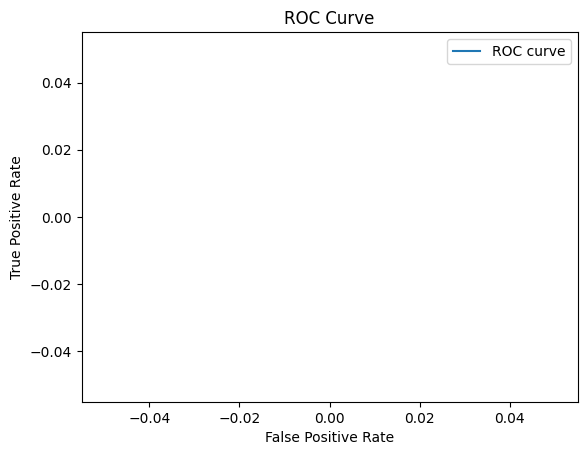

In [15]:
# Print  metrics 
print(f"Accuracy: {accuracy}")
print(f"AUROC: {auroc}")
print(f"Precision: {precision}")

# You can also plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()